In [ ]:
!pip install pydub
!pip install python_speech_features
!pip install neuralnetwork

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=fd91d1c0c94927a19505d5169305531db601e3af9c9fec805b4f8f6a438682eb
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, lightgbm, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
!pip install scikit-learn==1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-1.0-cp310-cp310-linux_x86_64.whl size=25849589 sha256=ecb40a88f4a35de02264dc559ff1be903394580849a739491bea91d35930a955
  Stored in directory: /root/.cache/pip/wheels/dc/ac/81/f7dc596b727fdedc2b8f05ef115393b07478ee09a76edebdff
Successfully built scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.

IMPORT DATASET

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import csv
import keras
import numpy
import random
import itertools
import tensorflow as tf
from numpy import *
from __future__ import division
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from numpy import loadtxt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from timeit import default_timer as timer
from itertools import product
from sklearn.preprocessing import LabelEncoder

In [ ]:
np.set_printoptions(suppress=True)

# mount gdrive with this code
from google.colab import drive
drive.mount('/content/drive')
#below where the file is in gdrive, change with your
feature_path = "/content/drive/My Drive/Program Skripsi/all_data/"
label_path = "/content/drive/My Drive/Program Skripsi/"

#load the dataset
#feature
feature = loadtxt(feature_path + 'feature_mfcc20_all_data.csv', delimiter=',')

#label
label = loadtxt(label_path + 'label_all_data.csv', delimiter=',')

X = feature
y = label

#print(X)
#print(y)

print(feature.shape)

Mounted at /content/drive
(180, 40)


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion Matrix', cmap=plt.cm.Blues):
     """
     This function prints and plots the confusion matrix.
     Normalization can be applied by setting `normalize=True`.
     """
     if normalize:
       cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
       print("Normalized Confusion Matrix")
     else:
       print('Confusion Matrix, without normalization')

     print(cm)
     plt.figure(figsize=(6,6), dpi=100)
     plt.imshow(cm, interpolation='nearest', cmap=cmap)
     plt.title(title)
     tick_marks = np.arange(len(classes))
     plt.xticks(tick_marks, classes, rotation=90)
     plt.yticks(tick_marks, classes)

     fmt = '.2f' if normalize else 'd'
     thresh = cm.max()/2
     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")

     plt.tight_layout()
     plt.ylabel('True Label')
     plt.xlabel('Predicted Label')

def tampil_cm_train(X_train, y_train, model):
    #confusion matrix
    class_names = ['Bali','Jawa','Madura']
    m = 1
    n = class_names
    m1 = str(m)
    m2 = str(n)
    model.save("feature_mfcc20_all_data_"+m2+'_'+m1+".hdf5") #sesuaikan dengan dataset yang digunakan
    print(model)

    pred_labels = model.predict(X_train)
    cm = confusion_matrix(y_train.argmax(axis=1), pred_labels.argmax(axis=1))
    cm

    class_names = ['Bali','Jawa','Madura']
    plot_confusion_matrix(cm, classes=class_names, normalize=False)
    plt.show()
    cm_stat(cm)
    return model.save("feature_mfcc20_all_data_"+m2+'_'+m1+".hdf5")

def tampil_cm_test(X_test, y_test, model):
    class_names = ['Bali','Jawa','Madura']
    m = 1
    n = class_names
    m1 = str(m)
    m2 = str(n)
    model.save("feature_mfcc20_all_data_"+m2+'_'+m1+".hdf5")
    print(model)

    pred_labels = model.predict(X_test) #test input
    cm = confusion_matrix(y_test.argmax(axis=1), pred_labels.argmax(axis=1))
    cm

    class_names = ['Bali','Jawa','Madura']
    plot_confusion_matrix(cm, classes=class_names, normalize=False)
    plt.show()
    cm_stat(cm)
    return model.save("feature_mfcc20_all_data_"+m2+'_'+m1+".hdf5")

def cm_stat(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    print("komponen")
    print("FP :",FP,"   FN :",FN,"   TP :",TP,"   TN :",TN)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print("TPR")
    print(TPR*100)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print("Precision")
    print(PPV*100)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    print("FDR")
    print(FDR*100)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print("Akurasi")
    print(ACC*100)

    return PPV,ACC,TPR,FDR

def predict(signal_predict):
    signals=np.stack([extract_feature_signal(signal_predict)])
    #do the prediction
    prediction = model.predict(signals, batch_size=1)
    print("Prediction: %s, confidence: %.2f" % (np.argmax(prediction), np.max(prediction)))

In [ ]:
def labels_encoder(y):
    y_new = LabelEncoder().fit_transform([''.join(str(l)) for l in y])
    return y_new

def labels_decoder(y):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y)
    lb.classes_
    labels_1_nn = lb.transform(y)
    return labels_1_nn

In [ ]:
#TRAINING&TESTING
def trainingdata (X, y):
    seed = np.random.seed(25)
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed) #menyatakan fungsi KFoldnya
    kf.get_n_splits(X) #Memisah testing-training sesuai spesifikasi KFoldnya #feature itu nama datanya nanti diganti aja
    print(kf) #untuk melihat spesifikasi KFoldnya
    cvscores = []
    m = 1
    n = class_names
    for train, test in kf.split(X, y):
        y_new = labels_decoder(y)

        #define the keras model
        model = Sequential()
        model.add(Dense(29, input_dim=40, activation='relu')) #input layer = nodenya dihitung dari jumlah koefisien mfcc
        model.add(Dense(3, activation='softmax'))

        #compile the keras model
        model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy']) #menggunakan multiclass classification
        print(model.summary())

        X_train, X_test, y_train, y_test = X[train], X[test], y_new[train], y_new[test]

        #fit the keras model on the dataset
        model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2) #verbose digunakan agar tidak ada error saat training
        loss, acc = model.evaluate(X_test, y_test, batch_size=1)
        print("Loss: %.2f, accuracy: %.2f" %(loss, acc))

        m1 = str(m)
        m2 = str(n)

        model.save("feature_mfcc20_all_data_"+m2+'_'+m1+".hdf5") #tergantung jumlah koefisiennya
        print(model)

        tampil_cm_train(X_train, y_train, model)
        tampil_cm_test(X_test, y_test, model)

        m = m+1

        #evaluate the keras model
        scores = model.evaluate(X, y_new)
        print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1]*100)

    # print out average and standard deviation of model performance to provide a robust estimate of the model's accuracy.
    maks = max(cvscores)
    print("akurasi tertinggi = ", max(cvscores))
    print("\nAkurasi rata rata is %.2f%%" % numpy.mean(cvscores))
    return maks, numpy.mean(cvscores)

In [ ]:
def run_all (X, y):
    X, y = feature, label
    max_acc, mean_acc = trainingdata(X, y)
    return max_acc, mean_acc

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 29)                1189      
                                                                 
 dense_1 (Dense)             (None, 3)                 90        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
162/162 - 1s - loss: 4.5233 - accuracy: 0.6111 - 937ms/epoch - 6ms/step
Epoch 2/100
162/162 - 0s - loss: 1.6359 - accuracy: 0.7407 - 212ms/epoch - 1ms/step
Epoch 3/100
162/162 - 0s - loss: 0.7934 - accuracy: 0.8951 - 223ms/epoch - 1ms/step
Epoch 4/100
162/162 - 0s - loss: 0.5183 - accuracy: 0.8704 - 210ms/epoch - 1ms/step
Epoch 5/100
162/162 - 0s - loss: 0.2893 - accur

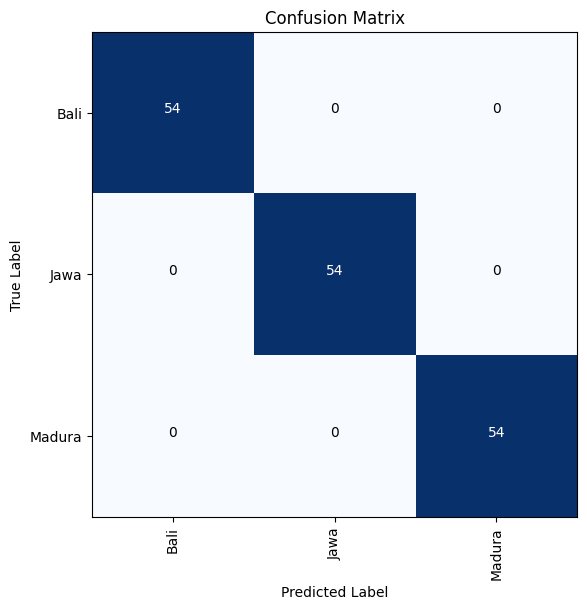

komponen
FP : [0 0 0]    FN : [0 0 0]    TP : [54 54 54]    TN : [108 108 108]
TPR
[100. 100. 100.]
Precision
[100. 100. 100.]
FDR
[0. 0. 0.]
Akurasi
[100. 100. 100.]
1/1 [==============================] - 0s 22ms/step
Confusion Matrix, without normalization
[[6 0 0]
 [0 6 0]
 [0 0 6]]


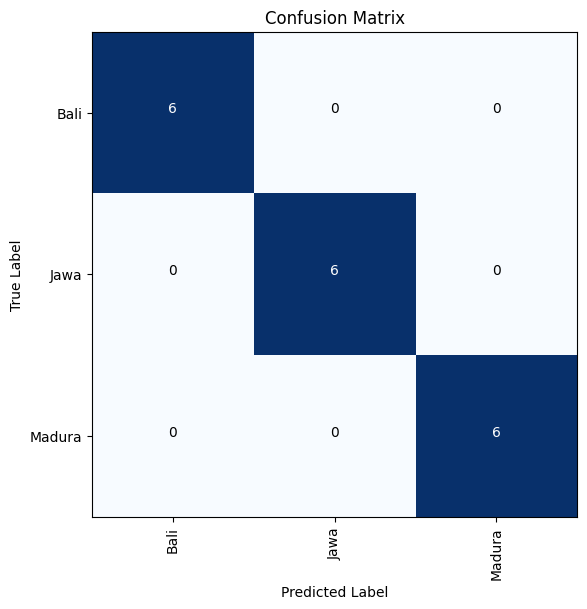

komponen
FP : [0 0 0]    FN : [0 0 0]    TP : [6 6 6]    TN : [12 12 12]
TPR
[100. 100. 100.]
Precision
[100. 100. 100.]
FDR
[0. 0. 0.]
Akurasi
[100. 100. 100.]
6/6 [==============================] - 0s 3ms/step - loss: 5.1924e-04 - accuracy: 1.0000

accuracy: 100.00%
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 29)                1189      
                                                                 
 dense_3 (Dense)             (None, 3)                 90        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
162/162 - 1s - loss: 8.4175 - accuracy: 0.4753 - 740ms/epoch - 5ms/step
Epoch 2/100
162/162 - 0s - loss: 2.4450 - accuracy: 0.7222 - 203ms/epoch - 1ms/step
Epoch 

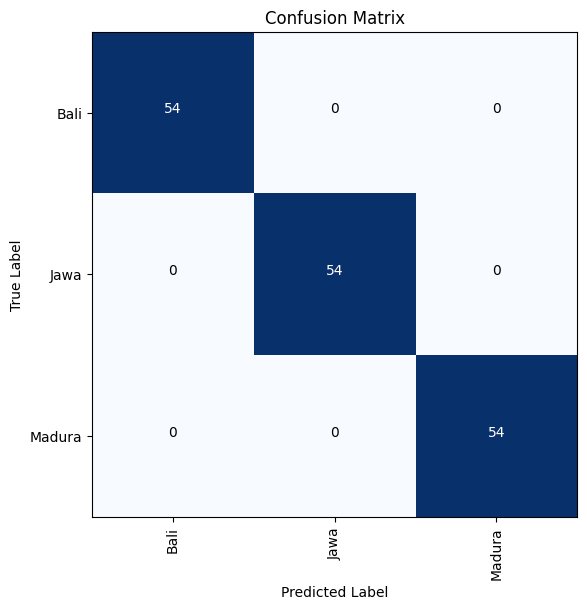

komponen
FP : [0 0 0]    FN : [0 0 0]    TP : [54 54 54]    TN : [108 108 108]
TPR
[100. 100. 100.]
Precision
[100. 100. 100.]
FDR
[0. 0. 0.]
Akurasi
[100. 100. 100.]
1/1 [==============================] - 0s 33ms/step
Confusion Matrix, without normalization
[[5 1 0]
 [0 6 0]
 [1 0 5]]


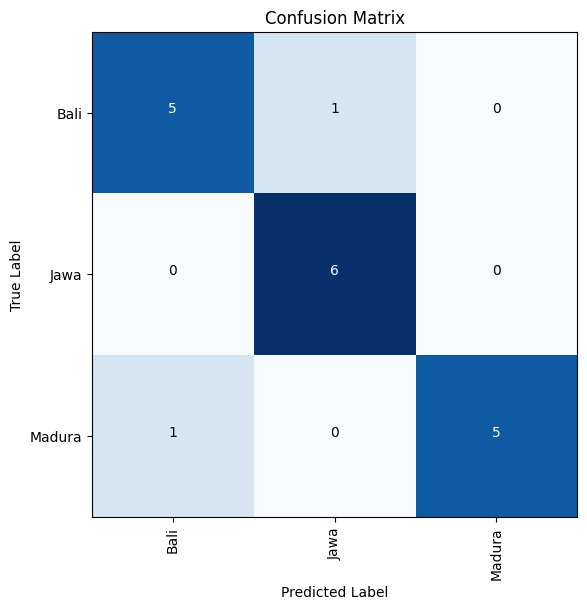

komponen
FP : [1 1 0]    FN : [1 0 1]    TP : [5 6 5]    TN : [11 11 12]
TPR
[ 83.33333333 100.          83.33333333]
Precision
[ 83.33333333  85.71428571 100.        ]
FDR
[16.66666667 14.28571429  0.        ]
Akurasi
[88.88888889 94.44444444 94.44444444]
6/6 [==============================] - 0s 4ms/step - loss: 0.1311 - accuracy: 0.9889

accuracy: 98.89%
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 29)                1189      
                                                                 
 dense_5 (Dense)             (None, 3)                 90        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
162/162 - 1s - loss: 6.2695 - accuracy: 0.5864 - 778ms/epoch - 5ms/step

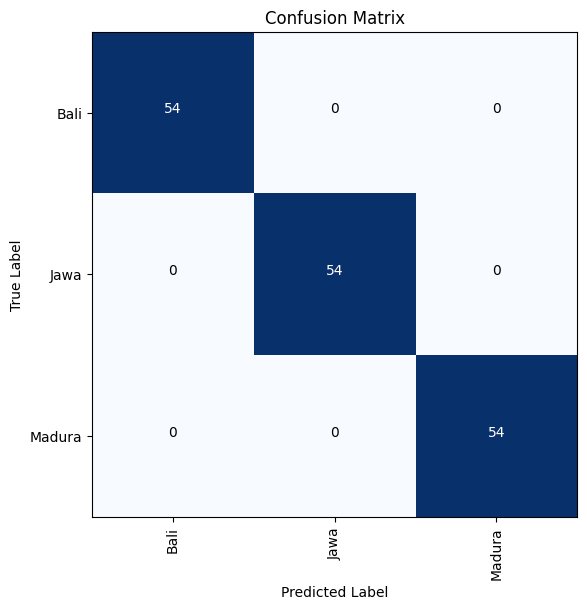

komponen
FP : [0 0 0]    FN : [0 0 0]    TP : [54 54 54]    TN : [108 108 108]
TPR
[100. 100. 100.]
Precision
[100. 100. 100.]
FDR
[0. 0. 0.]
Akurasi
[100. 100. 100.]
1/1 [==============================] - 0s 23ms/step
Confusion Matrix, without normalization
[[5 0 1]
 [0 6 0]
 [1 0 5]]


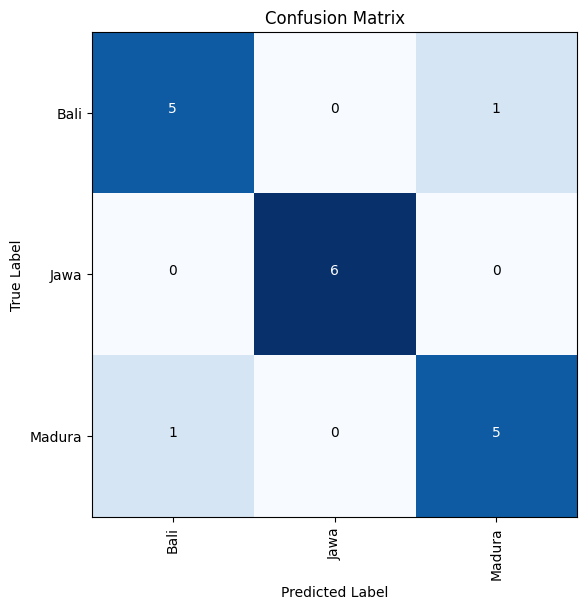

komponen
FP : [1 0 1]    FN : [1 0 1]    TP : [5 6 5]    TN : [11 12 11]
TPR
[ 83.33333333 100.          83.33333333]
Precision
[ 83.33333333 100.          83.33333333]
FDR
[16.66666667  0.         16.66666667]
Akurasi
[ 88.88888889 100.          88.88888889]
6/6 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9889

accuracy: 98.89%
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 29)                1189      
                                                                 
 dense_7 (Dense)             (None, 3)                 90        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
162/162 - 1s - loss: 6.3803 - accuracy: 0.3580 - 740ms/epoch - 5ms/s

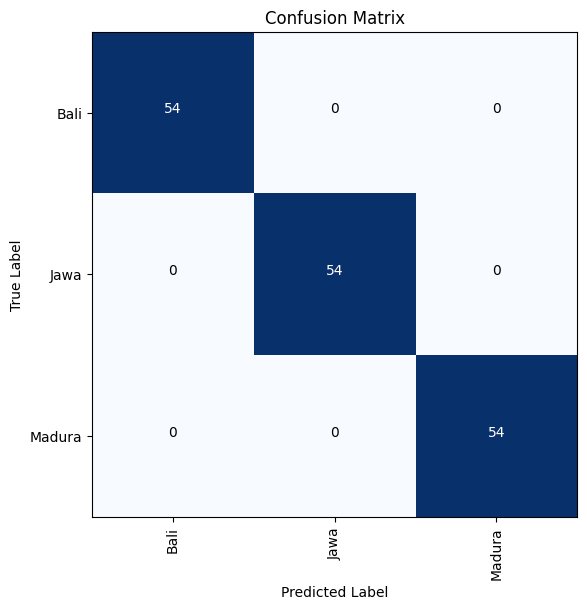

komponen
FP : [0 0 0]    FN : [0 0 0]    TP : [54 54 54]    TN : [108 108 108]
TPR
[100. 100. 100.]
Precision
[100. 100. 100.]
FDR
[0. 0. 0.]
Akurasi
[100. 100. 100.]
1/1 [==============================] - 0s 22ms/step
Confusion Matrix, without normalization
[[5 0 1]
 [0 6 0]
 [0 0 6]]


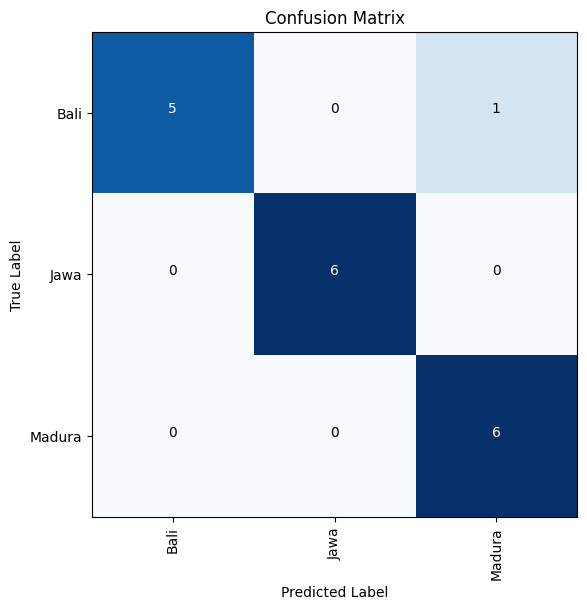

komponen
FP : [0 0 1]    FN : [1 0 0]    TP : [5 6 6]    TN : [12 12 11]
TPR
[ 83.33333333 100.         100.        ]
Precision
[100.         100.          85.71428571]
FDR
[ 0.          0.         14.28571429]
Akurasi
[ 94.44444444 100.          94.44444444]
6/6 [==============================] - 0s 3ms/step - loss: 0.1962 - accuracy: 0.9944

accuracy: 99.44%
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 29)                1189      
                                                                 
 dense_9 (Dense)             (None, 3)                 90        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
162/162 - 1s - loss: 5.9944 - accuracy: 0.5494 - 742ms/epoch - 5ms/s

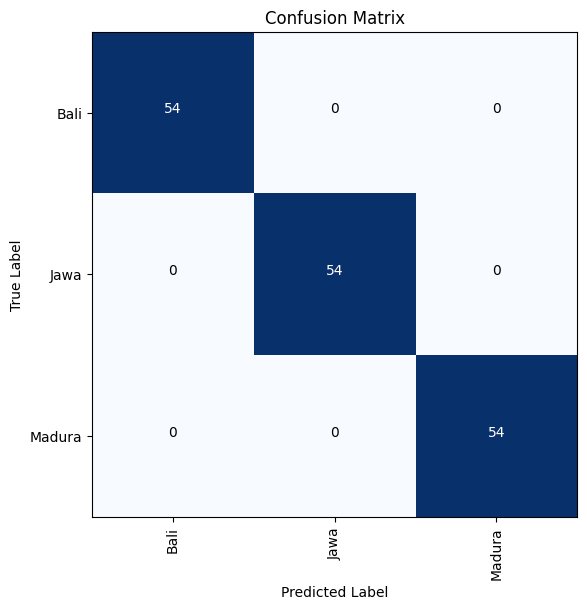

komponen
FP : [0 0 0]    FN : [0 0 0]    TP : [54 54 54]    TN : [108 108 108]
TPR
[100. 100. 100.]
Precision
[100. 100. 100.]
FDR
[0. 0. 0.]
Akurasi
[100. 100. 100.]
1/1 [==============================] - 0s 24ms/step
Confusion Matrix, without normalization
[[6 0 0]
 [0 6 0]
 [0 0 6]]


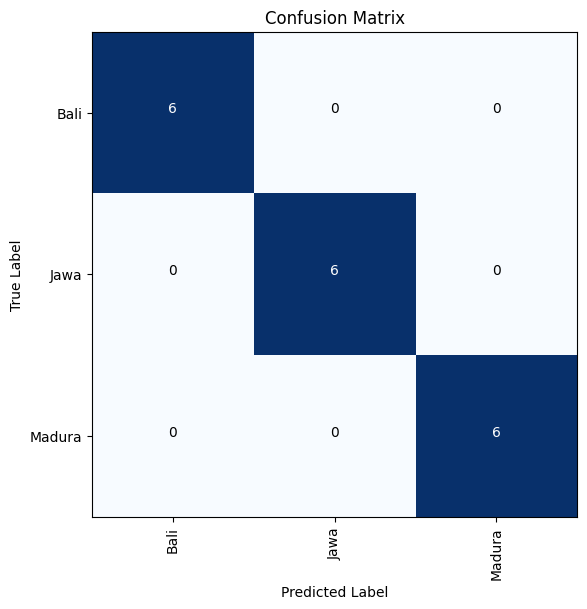

komponen
FP : [0 0 0]    FN : [0 0 0]    TP : [6 6 6]    TN : [12 12 12]
TPR
[100. 100. 100.]
Precision
[100. 100. 100.]
FDR
[0. 0. 0.]
Akurasi
[100. 100. 100.]
6/6 [==============================] - 0s 3ms/step - loss: 5.5613e-06 - accuracy: 1.0000

accuracy: 100.00%
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 29)                1189      
                                                                 
 dense_11 (Dense)            (None, 3)                 90        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
162/162 - 1s - loss: 5.9941 - accuracy: 0.5988 - 758ms/epoch - 5ms/step
Epoch 2/100
162/162 - 0s - loss: 1.1382 - accuracy: 0.8272 - 226ms/epoch - 1ms/step
Epoch 

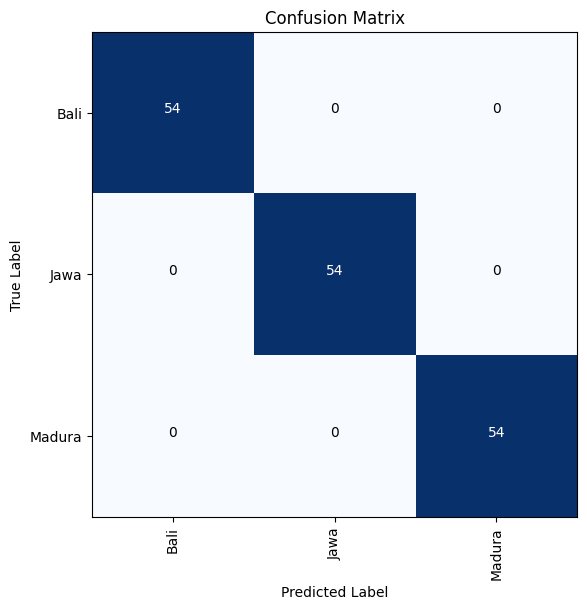

komponen
FP : [0 0 0]    FN : [0 0 0]    TP : [54 54 54]    TN : [108 108 108]
TPR
[100. 100. 100.]
Precision
[100. 100. 100.]
FDR
[0. 0. 0.]
Akurasi
[100. 100. 100.]
1/1 [==============================] - 0s 22ms/step
Confusion Matrix, without normalization
[[5 0 1]
 [0 6 0]
 [0 0 6]]


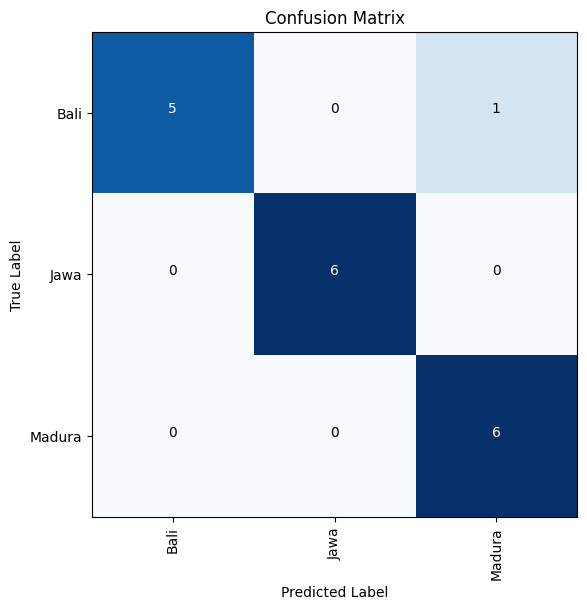

komponen
FP : [0 0 1]    FN : [1 0 0]    TP : [5 6 6]    TN : [12 12 11]
TPR
[ 83.33333333 100.         100.        ]
Precision
[100.         100.          85.71428571]
FDR
[ 0.          0.         14.28571429]
Akurasi
[ 94.44444444 100.          94.44444444]
6/6 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.9944

accuracy: 99.44%
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 29)                1189      
                                                                 
 dense_13 (Dense)            (None, 3)                 90        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
162/162 - 1s - loss: 7.6585 - accuracy: 0.5062 - 796ms/epoch - 5ms/s

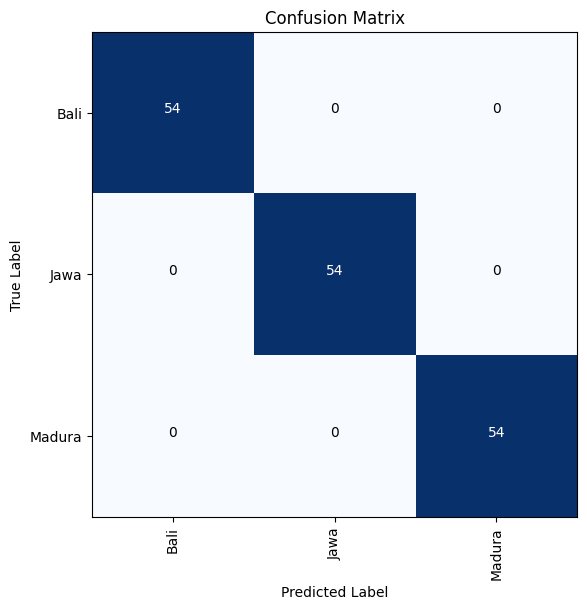

komponen
FP : [0 0 0]    FN : [0 0 0]    TP : [54 54 54]    TN : [108 108 108]
TPR
[100. 100. 100.]
Precision
[100. 100. 100.]
FDR
[0. 0. 0.]
Akurasi
[100. 100. 100.]
1/1 [==============================] - 0s 33ms/step
Confusion Matrix, without normalization
[[6 0 0]
 [0 6 0]
 [4 0 2]]


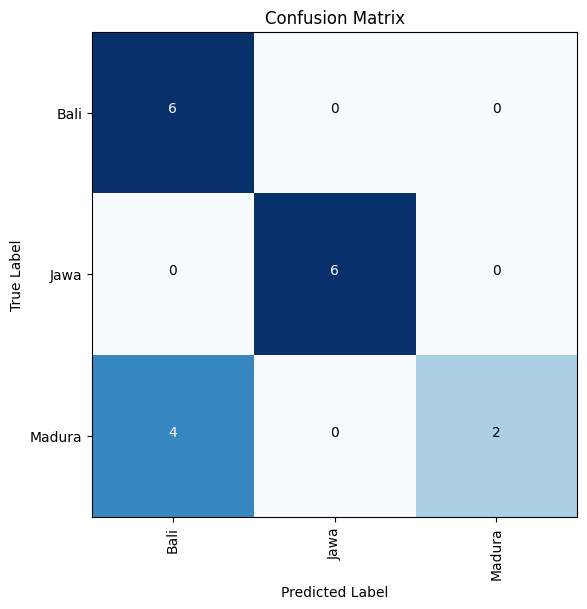

komponen
FP : [4 0 0]    FN : [0 0 4]    TP : [6 6 2]    TN : [ 8 12 12]
TPR
[100.         100.          33.33333333]
Precision
[ 60. 100. 100.]
FDR
[40.  0.  0.]
Akurasi
[ 77.77777778 100.          77.77777778]
6/6 [==============================] - 0s 3ms/step - loss: 0.1373 - accuracy: 0.9778

accuracy: 97.78%
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 29)                1189      
                                                                 
 dense_15 (Dense)            (None, 3)                 90        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
162/162 - 1s - loss: 5.8935 - accuracy: 0.6173 - 747ms/epoch - 5ms/step
Epoch 2/100
162/162 - 0s - loss: 1.2833 - ac

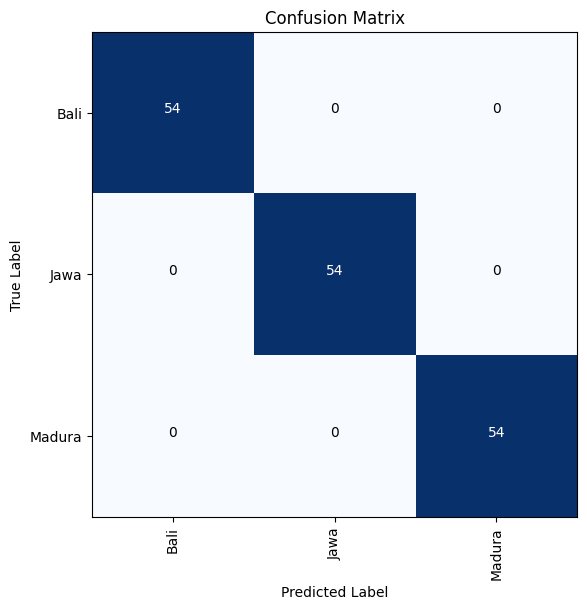

komponen
FP : [0 0 0]    FN : [0 0 0]    TP : [54 54 54]    TN : [108 108 108]
TPR
[100. 100. 100.]
Precision
[100. 100. 100.]
FDR
[0. 0. 0.]
Akurasi
[100. 100. 100.]
1/1 [==============================] - 0s 22ms/step
Confusion Matrix, without normalization
[[6 0 0]
 [0 6 0]
 [0 0 6]]


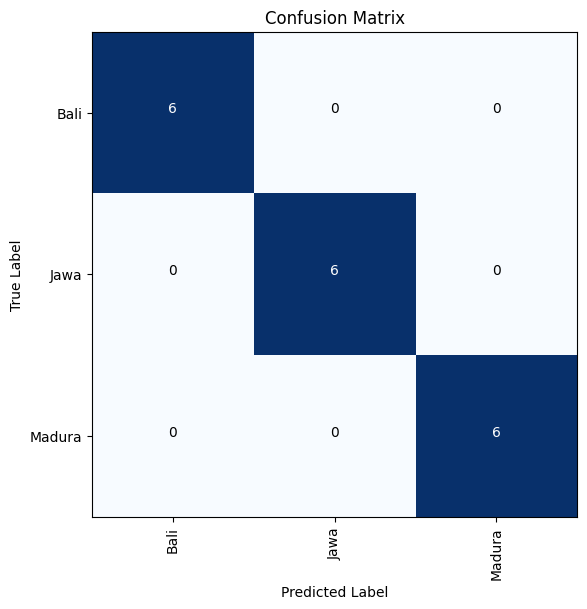

komponen
FP : [0 0 0]    FN : [0 0 0]    TP : [6 6 6]    TN : [12 12 12]
TPR
[100. 100. 100.]
Precision
[100. 100. 100.]
FDR
[0. 0. 0.]
Akurasi
[100. 100. 100.]
6/6 [==============================] - 0s 3ms/step - loss: 1.1919e-04 - accuracy: 1.0000

accuracy: 100.00%
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 29)                1189      
                                                                 
 dense_17 (Dense)            (None, 3)                 90        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
162/162 - 1s - loss: 5.0949 - accuracy: 0.4444 - 766ms/epoch - 5ms/step
Epoch 2/100
162/162 - 0s - loss: 0.9831 - accuracy: 0.7901 - 223ms/epoch - 1ms/step
Epoch 

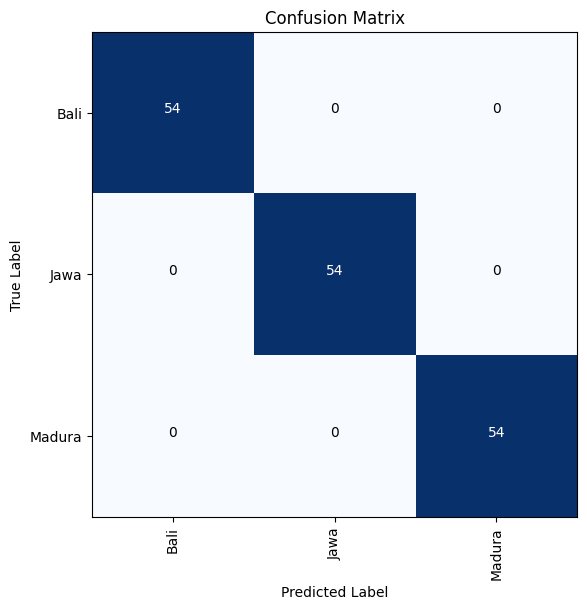

komponen
FP : [0 0 0]    FN : [0 0 0]    TP : [54 54 54]    TN : [108 108 108]
TPR
[100. 100. 100.]
Precision
[100. 100. 100.]
FDR
[0. 0. 0.]
Akurasi
[100. 100. 100.]
1/1 [==============================] - 0s 51ms/step
Confusion Matrix, without normalization
[[6 0 0]
 [0 6 0]
 [1 0 5]]


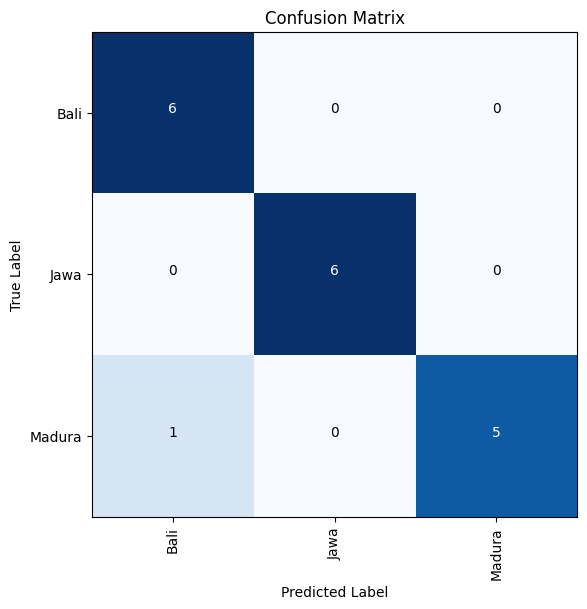

komponen
FP : [1 0 0]    FN : [0 0 1]    TP : [6 6 5]    TN : [11 12 12]
TPR
[100.         100.          83.33333333]
Precision
[ 85.71428571 100.         100.        ]
FDR
[14.28571429  0.          0.        ]
Akurasi
[ 94.44444444 100.          94.44444444]
6/6 [==============================] - 0s 5ms/step - loss: 0.0239 - accuracy: 0.9944

accuracy: 99.44%
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 29)                1189      
                                                                 
 dense_19 (Dense)            (None, 3)                 90        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
162/162 - 1s - loss: 4.3051 - accuracy: 0.5864 - 1s/epoch - 7ms/step

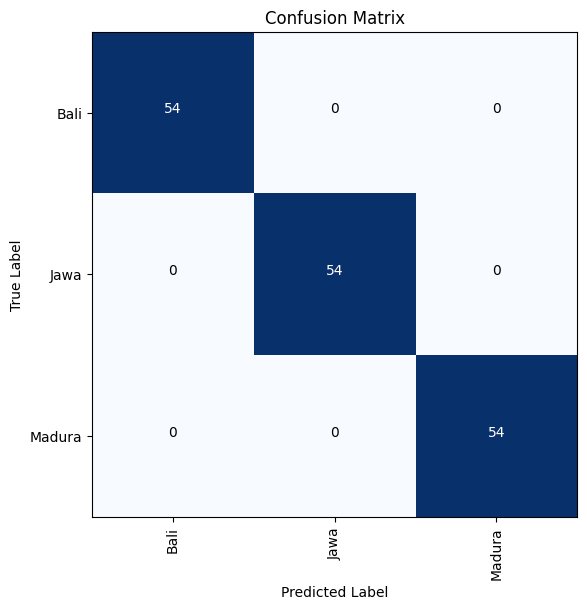

komponen
FP : [0 0 0]    FN : [0 0 0]    TP : [54 54 54]    TN : [108 108 108]
TPR
[100. 100. 100.]
Precision
[100. 100. 100.]
FDR
[0. 0. 0.]
Akurasi
[100. 100. 100.]
1/1 [==============================] - 0s 21ms/step
Confusion Matrix, without normalization
[[6 0 0]
 [0 6 0]
 [2 0 4]]


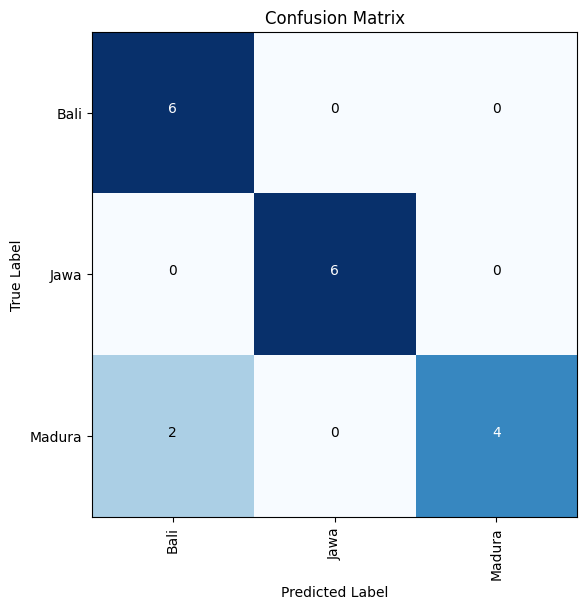

komponen
FP : [2 0 0]    FN : [0 0 2]    TP : [6 6 4]    TN : [10 12 12]
TPR
[100.         100.          66.66666667]
Precision
[ 75. 100. 100.]
FDR
[25.  0.  0.]
Akurasi
[ 88.88888889 100.          88.88888889]
6/6 [==============================] - 0s 3ms/step - loss: 0.0847 - accuracy: 0.9889

accuracy: 98.89%
akurasi tertinggi =  100.0

Akurasi rata rata is 99.28%


In [ ]:
scores_logat = []
scores_logat_testing = []

class_names = ['Bali','Jawa','Madura']
logat_max_acc, logat_mean_acc = run_all (40,class_names)
scores_logat.append(logat_mean_acc)